# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
# importação dos módulos

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
import pdfplumber
import re

In [2]:
# leitura do arquivo csv com pandas

dados = pd.read_csv('b1abb33c4f.csv')

In [3]:
# transformação do csv em DataFrame

df = pd.DataFrame(dados)

In [4]:
# conversão dos títulos em minúsculo (desnecessário aqui, mas melhor para manipular)

df.columns = df.columns.str.lower()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origem        27028 non-null  int64  
 1   codestab      26913 non-null  float64
 2   codmunnasc    27028 non-null  int64  
 3   locnasc       27028 non-null  int64  
 4   idademae      27028 non-null  int64  
 5   estcivmae     26711 non-null  float64
 6   escmae        26716 non-null  object 
 7   codocupmae    24121 non-null  float64
 8   qtdfilvivo    25455 non-null  float64
 9   qtdfilmort    24930 non-null  float64
 10  codmunres     27028 non-null  int64  
 11  gestacao      25796 non-null  object 
 12  gravidez      26949 non-null  object 
 13  parto         26979 non-null  object 
 14  consultas     27028 non-null  int64  
 15  dtnasc        27028 non-null  object 
 16  horanasc      27007 non-null  float64
 17  sexo          27024 non-null  object 
 18  apgar1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [20]:
df['sexo']

0        Masculino
1         Feminino
2         Feminino
3         Feminino
4         Feminino
           ...    
27023    Masculino
27024    Masculino
27025    Masculino
27026    Masculino
27027    Masculino
Name: sexo, Length: 27028, dtype: object

In [16]:
# nova categoria para as faixas de apgar5

# criação de uma função para aplicar os novos valores

def categorizar(valor):
    if valor <= 3:
        return 'asfixia grave'
    elif valor in [4, 5]:
        return 'asfixia moderada'
    elif valor in [7, 8]:
        return 'asfixia leve'
    else:
        return 'normal'

# criação de nova coluna e aplicação dos valores 

df['apgar5_var'] = df['apgar5'].apply(categorizar)


# separação do resultado em uma variante para usar posteriormente, se necessário, + contagem de resultados

contagem_apgar5_var = df['apgar5_var'].value_counts()
contagem_apgar5_var

normal              24651
asfixia leve         2235
asfixia grave          74
asfixia moderada       68
Name: apgar5_var, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

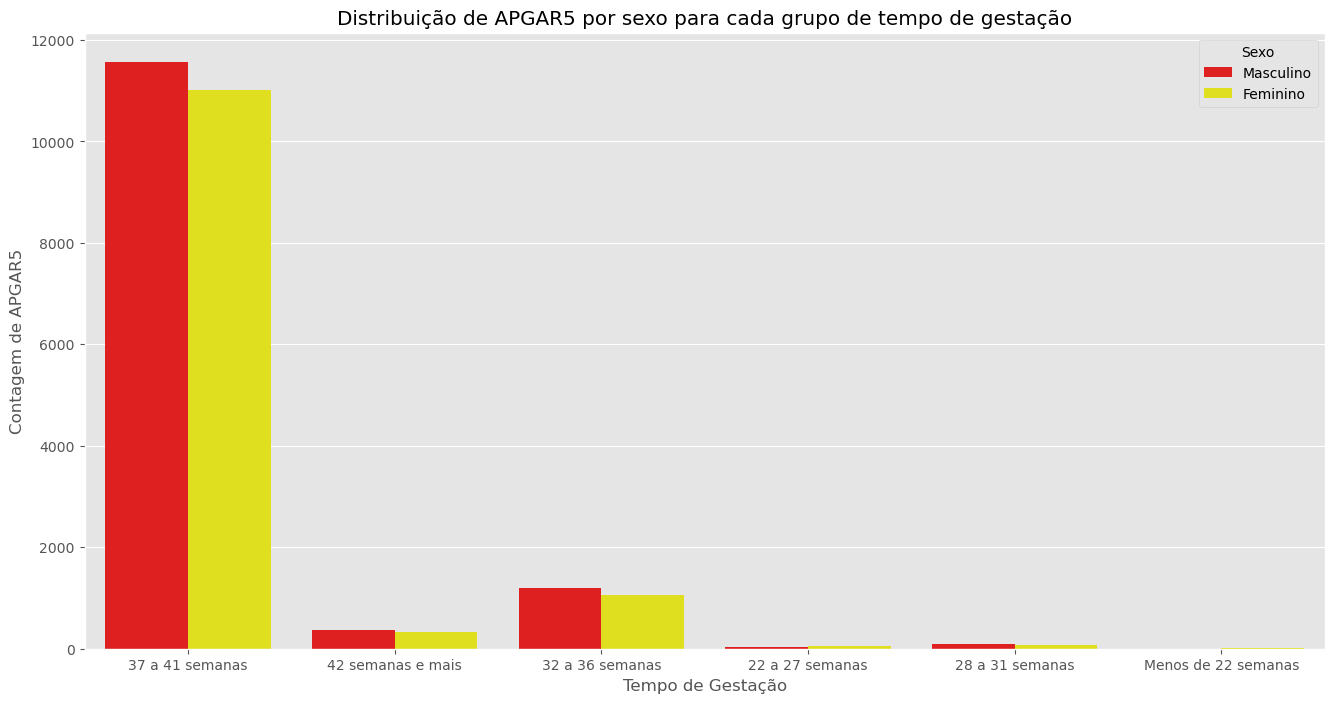

In [56]:
# define a paleta de cores para os sexos

palette = {"Masculino": "red", "Feminino": "yellow"}

# cria o gráfico de barras usando seaborn

plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='gestacao', hue='sexo', palette=palette, dodge=True)
plt.title('Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Contagem de APGAR5')
plt.legend(title='Sexo')
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [39]:
tab_cruz = pd.crosstab(df['gestacao'], df['apgar5_var'])
tab_cruz

apgar5_var,asfixia grave,asfixia leve,asfixia moderada,normal
gestacao,,,,
22 a 27 semanas,21,34,1,30
28 a 31 semanas,3,72,12,78
32 a 36 semanas,8,418,19,1804
37 a 41 semanas,33,1568,28,20960
42 semanas e mais,1,49,1,649
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [43]:
# calcula a soma de cada linha
soma_linhas = tab_cruz.sum(axis=1)

# divide cada valor da tabela pela soma da linha correspondente
tab_perc = tab_cruz.div(soma_linhas, axis=0) * 100

# arredonda os valores para duas casas decimais
tab_perc = tab_perc.round(2)
tab_perc


apgar5_var,asfixia grave,asfixia leve,asfixia moderada,normal
gestacao,,,,
22 a 27 semanas,24.42,39.53,1.16,34.88
28 a 31 semanas,1.82,43.64,7.27,47.27
32 a 36 semanas,0.36,18.59,0.84,80.21
37 a 41 semanas,0.15,6.94,0.12,92.79
42 semanas e mais,0.14,7.00,0.14,92.71
Menos de 22 semanas,28.57,14.29,0.00,57.14


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

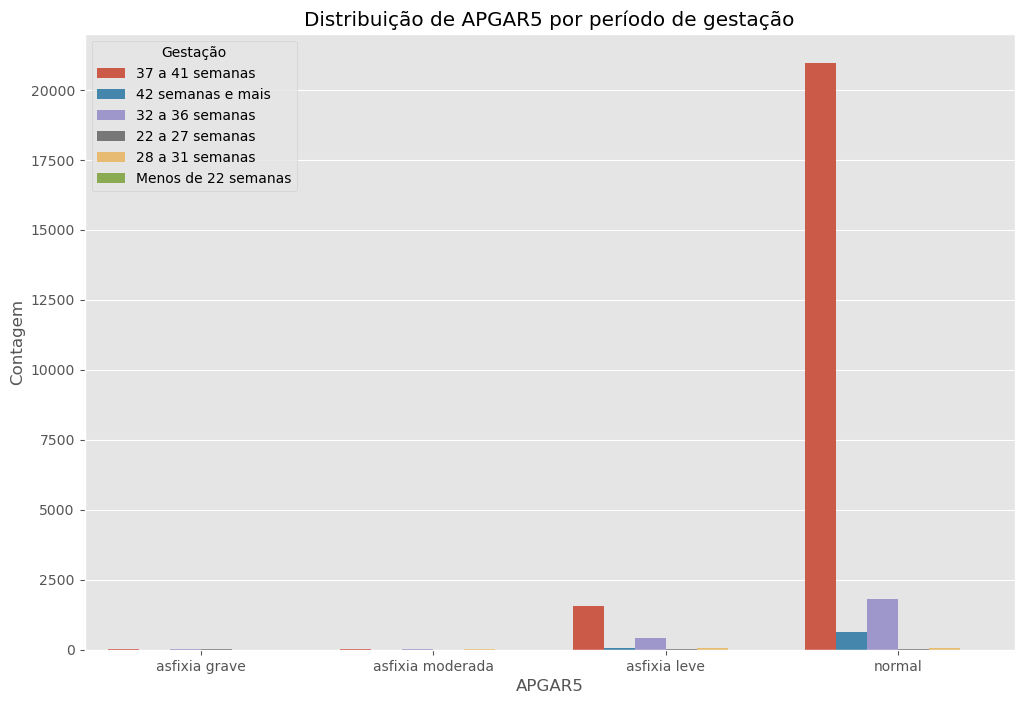

In [44]:
# Define a ordem das categorias de APGAR5 para garantir uma ordem lógica no gráfico
order = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Cria o gráfico de barras
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='apgar5_var', hue='gestacao', order=order)
plt.title('Distribuição de APGAR5 por período de gestação')
plt.xlabel('APGAR5')
plt.ylabel('Contagem')
plt.legend(title='Gestação')
plt.show()


<Figure size 1200x800 with 0 Axes>

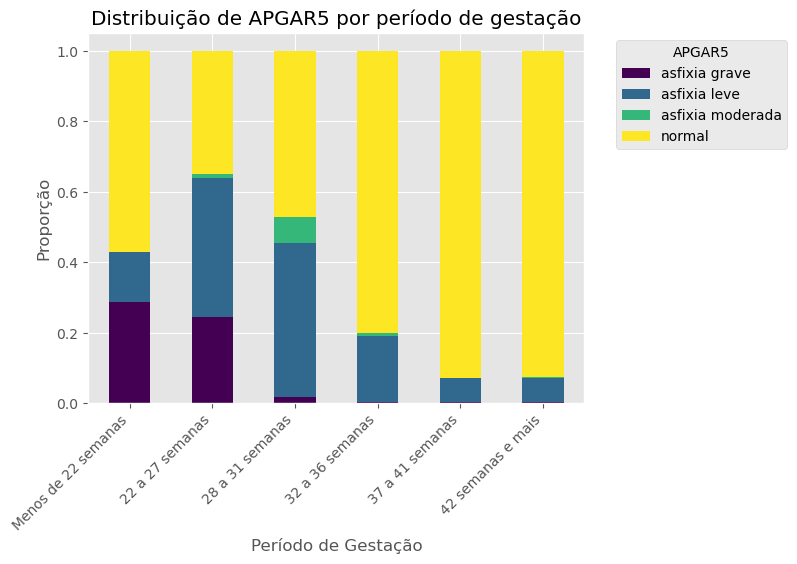

In [51]:
# sugestão para uma melhor visualização das proporções

# reordenação do índices para maior sentido nos dados

tab_cruz_reordered = tab_cruz.reindex(['Menos de 22 semanas', 
                                       '22 a 27 semanas', '28 a 31 semanas', 
                                       '32 a 36 semanas', '37 a 41 semanas', 
                                       '42 semanas e mais'])

# proporções 

tab_perc_prop_reordered = tab_cruz_reordered.div(tab_cruz_reordered.sum(axis=1), axis=0)

# cria o gráfico de barras empilhadas

plt.figure(figsize=(12, 8))
tab_perc_prop_reordered.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Distribuição de APGAR5 por período de gestação')
plt.xlabel('Período de Gestação')
plt.ylabel('Proporção')
plt.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

- do gráfico acima plotado, é possível notar que quanto maior o tempo de gestação (até 41 semanas), maior a chance do bebê nascer sem asfixia. 

- da mesma forma, é possível dizer que quanto menor o tempo de gestação, maior a quantidade de casos de asfixia grave.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

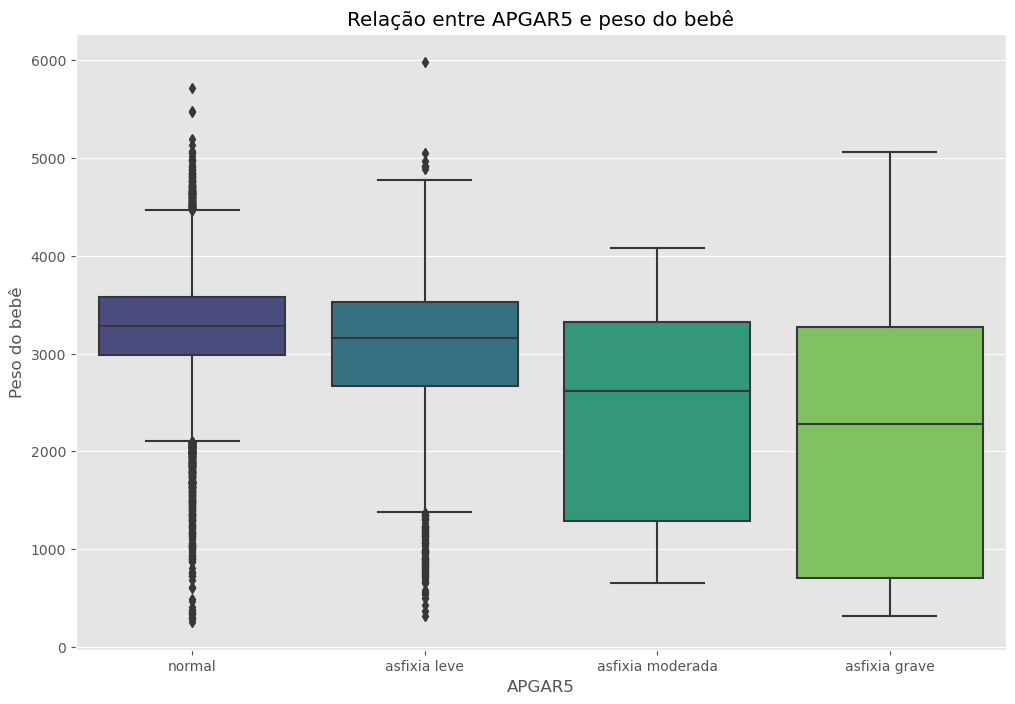

In [63]:
# ordednando 

# Reordena as categorias de APGAR5

order = ['normal', 'asfixia leve', 'asfixia moderada', 'asfixia grave']
tab_cruz_reordered = tab_cruz.reindex(columns=order)

# criação do gráfico de dispersão

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='apgar5_var', y='peso', palette='viridis', order= order)
plt.title('Relação entre APGAR5 e peso do bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do bebê')
plt.show()